In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [7]:
wine = pd.read_csv('Wine/wine.data',names=['Class','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315','Proline']);
wine.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
wine.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [12]:
print(np.any(wine.isnull()))
print(wine.shape)

False
(178, 14)


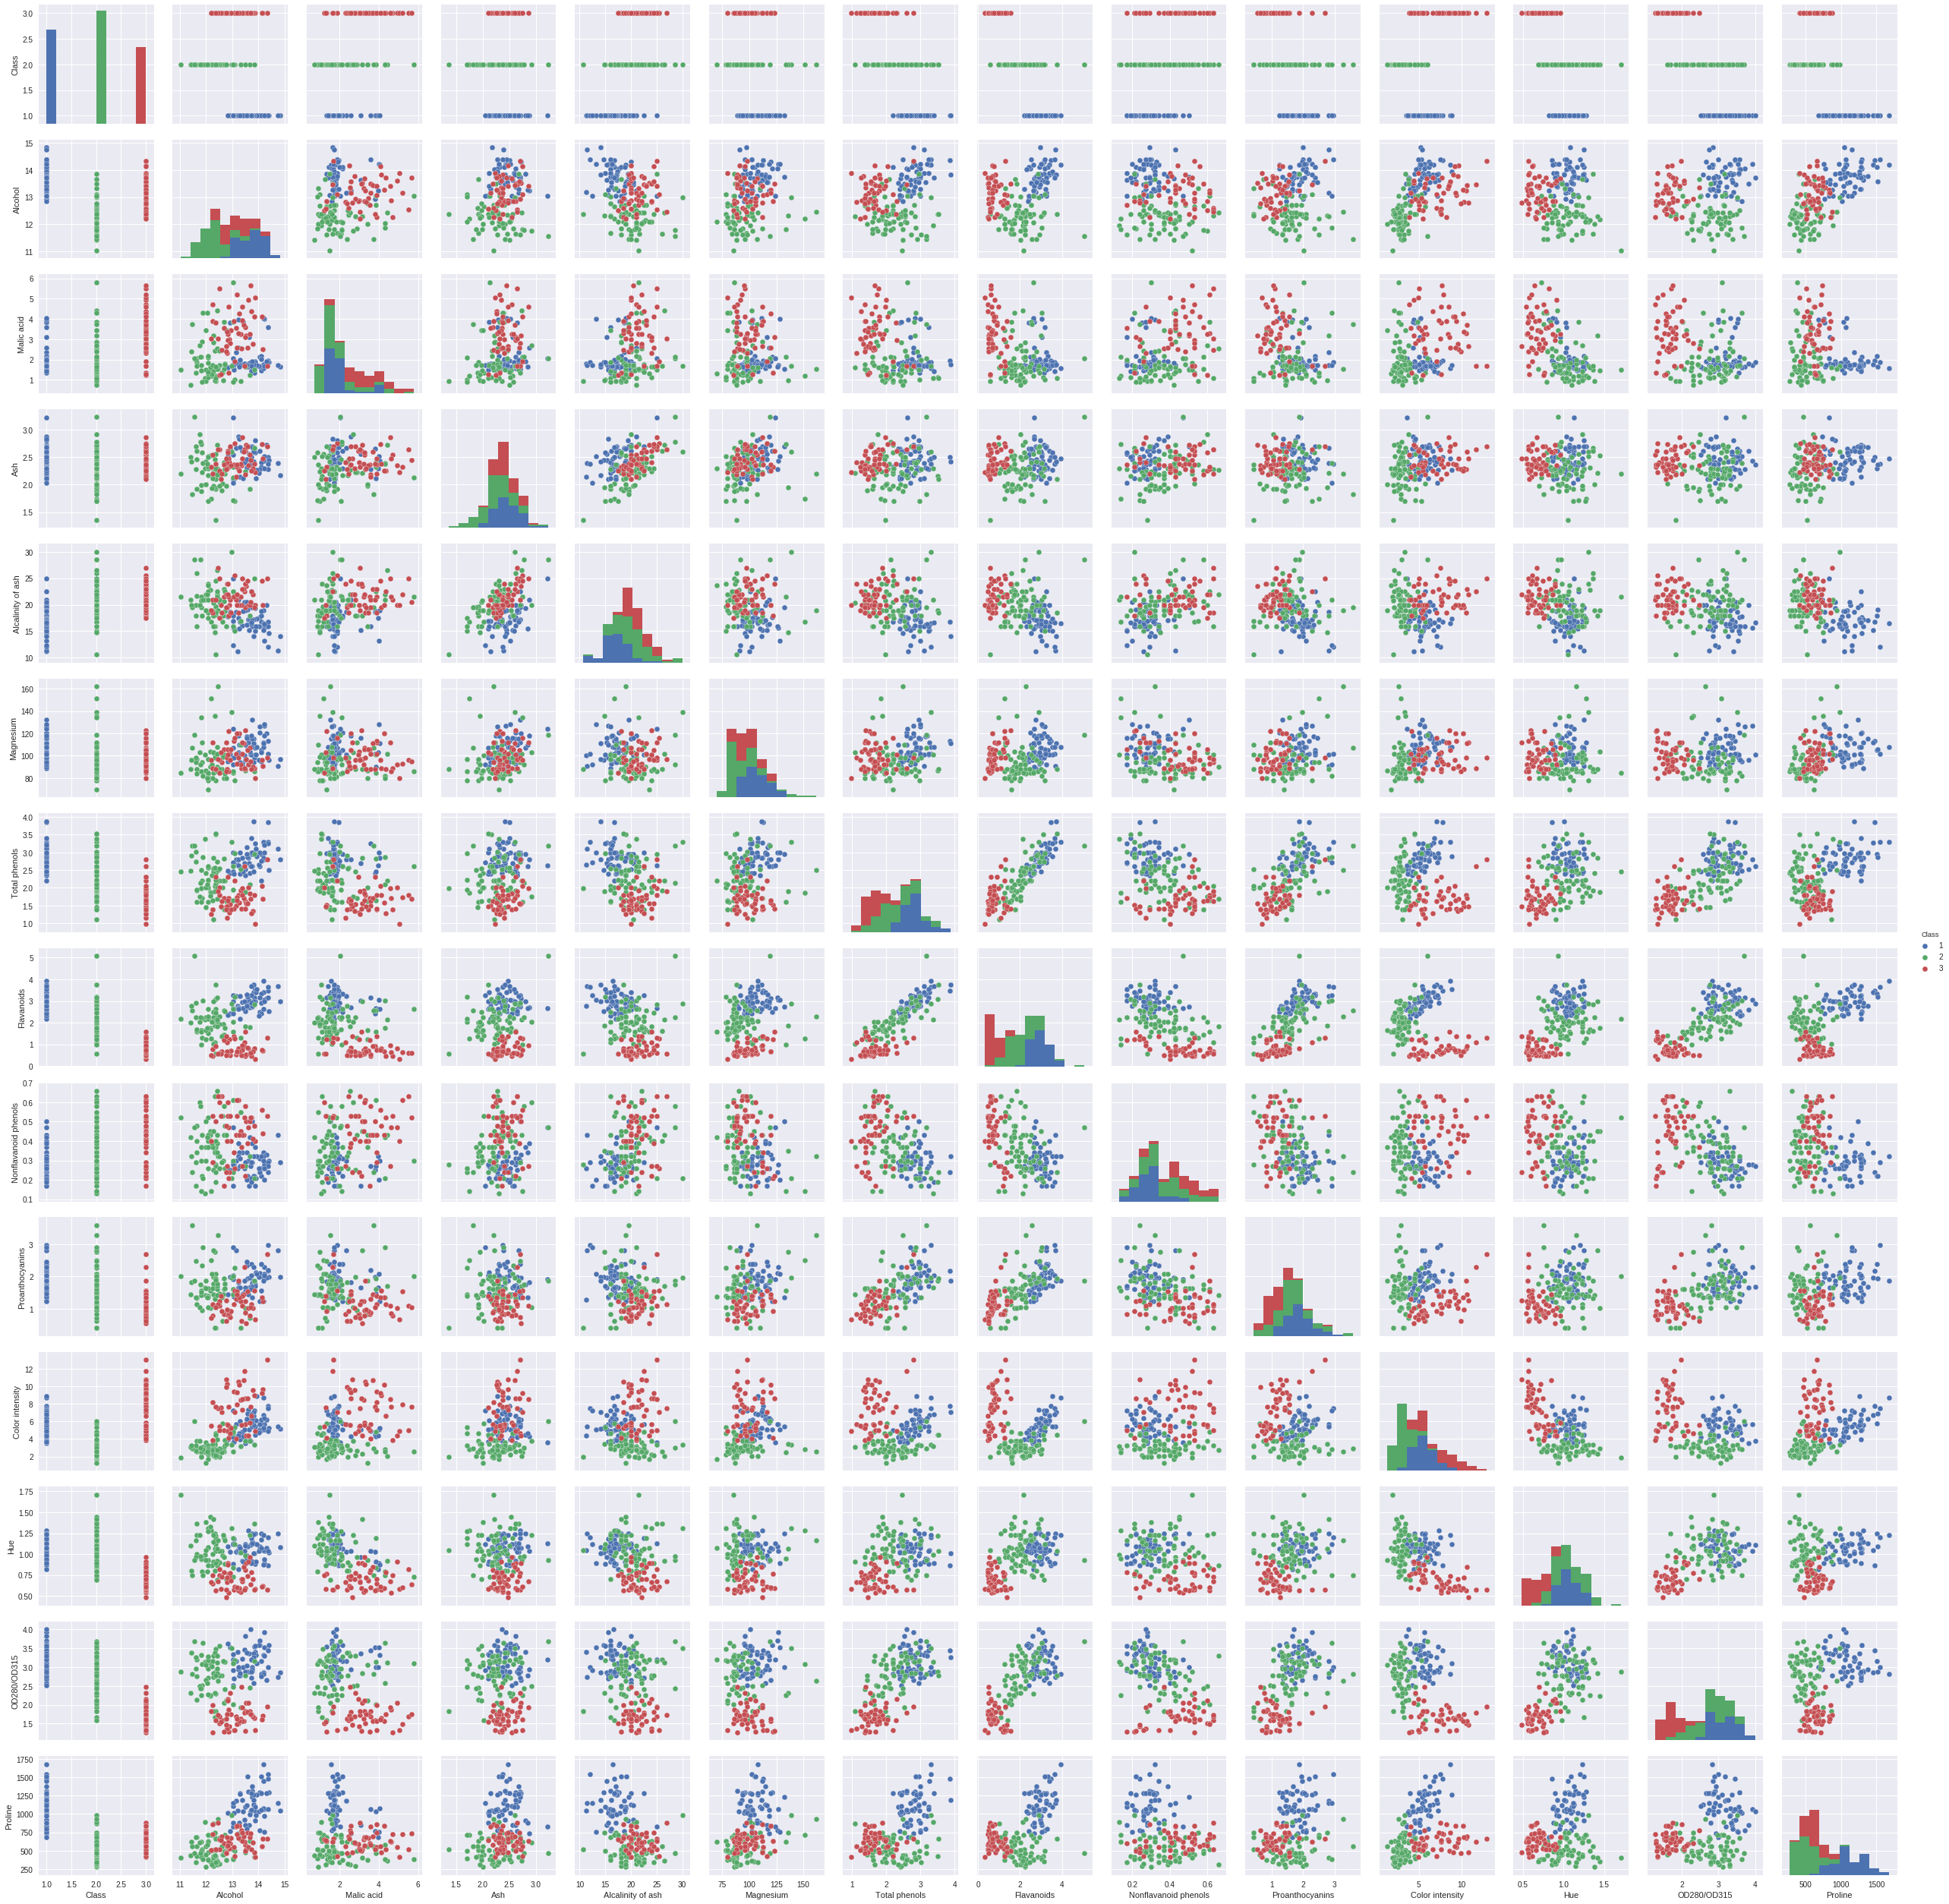

In [15]:
%matplotlib inline
sb.pairplot(wine, hue='Class')

In [16]:
def averageDistToCenter(X,C):
    avdist = np.sum(np.sqrt(np.sum((X - C)**2,axis=0)),axis=0)
    avdist /= np.maximum(np.size(X,axis=1),1)
    return avdist

def KMeans(K, X, doPrinting=False):
    d = np.size(X,axis=0)
    N = np.size(X,axis=1)
    I = np.eye(K)
    R = X[:,np.random.randint(0,N,K)] #random start centers
    M = np.zeros((d,K)).astype(int)
    changes = True
    iters = 0
    while changes:
#         D = np.sum((R.T[np.newaxis,:,:] - X.T[:,np.newaxis,:])**2., axis=-1).T # distances from centers
        D = -2. * np.dot(X.T,R) + np.sum(R**2,axis=0,keepdims=True)# it is not necessary to add X^2
        m = np.argmin(D, axis=1)
        newM = np.take(I,m,axis=0).astype(int) # matrix of membership
        changes = not np.array_equal(M,newM)
        M = newM
        R = np.dot(X,M)/np.maximum(np.sum(M.T,axis=1),1) # new centers
        iters +=1
    if doPrinting:
        avDistToCenter = np.array([averageDistToCenter(X[:,M[:,i] == 1], R[:,i,np.newaxis]) for i in range(K)])
        groupSizes = np.sum(M.T,axis=1)
        print('Average distance to center within groups:\n',avDistToCenter)
        print("Iterations: ", iters, "\n")
        print("Group sizes: ", groupSizes, "\n")
    return R, M, m, groupSizes

In [18]:
wineData = wine.iloc[:,1:].values.T
R, M, m, groupSizes = KMeans(3, wineData, doPrinting=True)

Average distance to center within groups:
 [ 142.04575569   68.87463704   82.69643457]
Iterations:  8 

Group sizes:  [47 69 62] 



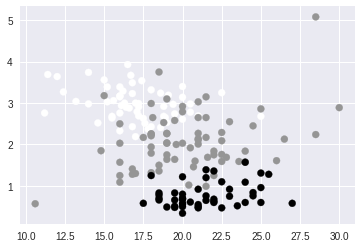

In [26]:
plt.scatter(wineData[3,:],wineData[6,:],c=wine.iloc[:,0].T)
plt.show()

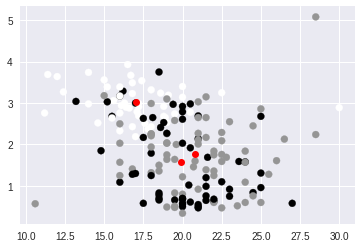

In [28]:
plt.scatter(wineData[3,:],wineData[6,:],c=m)
plt.plot(R[3,:],R[6,:],'ro')
plt.show()

In [29]:
for i in range(3):
    print('Group: ', i, ' # Size: ',groupSizes[i], ' # Results: ')
    for c in range(1,4):
        s = np.sum(M.T[i,wine.values[:,0]==c])
        print(c, s, ' -> ', s/groupSizes[i])


Group:  0  # Size:  47  # Results: 
1 46  ->  0.978723404255
2 1  ->  0.0212765957447
3 0  ->  0.0
Group:  1  # Size:  69  # Results: 
1 0  ->  0.0
2 50  ->  0.724637681159
3 19  ->  0.275362318841
Group:  2  # Size:  62  # Results: 
1 13  ->  0.209677419355
2 20  ->  0.322580645161
3 29  ->  0.467741935484


In [59]:
wineDataNorm = (wineData - wineData.min(axis=1, keepdims=True)) / (wineData.max(axis=1, keepdims=True) - wineData.min(axis=1, keepdims=True))
pd.DataFrame(wineDataNorm.T).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
R, M, m, groupSizes = KMeans(3, wineDataNorm, doPrinting=True)

Average distance to center within groups:
 [ 0.54480838  0.51031167  0.44111985]
Iterations:  5 

Group sizes:  [62 55 61] 



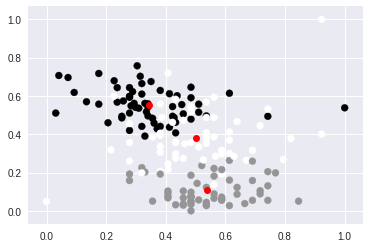

In [61]:
plt.scatter(wineDataNorm[3,:],wineDataNorm[6,:],c=m)
plt.plot(R[3,:],R[6,:],'ro')
plt.show()

In [62]:
for i in range(3):
    print('Group: ', i, ' # Size: ',groupSizes[i], ' # Results: ')
    for c in range(1,4):
        s = np.sum(M.T[i,wine.values[:,0]==c])
        print(c, s, ' -> ', s/groupSizes[i]*100,'%')


Group:  0  # Size:  62  # Results: 
1 0  ->  0.0 %
2 62  ->  100.0 %
3 0  ->  0.0 %
Group:  1  # Size:  55  # Results: 
1 0  ->  0.0 %
2 7  ->  12.7272727273 %
3 48  ->  87.2727272727 %
Group:  2  # Size:  61  # Results: 
1 59  ->  96.7213114754 %
2 2  ->  3.27868852459 %
3 0  ->  0.0 %


In [63]:
wineDataNorm2 = (wineData - wineData.mean(axis=1, keepdims=True)) / wineData.std(axis=1, keepdims=True)

In [64]:
R, M, m, groupSizes = KMeans(3, wineDataNorm2, doPrinting=True)

Average distance to center within groups:
 [ 2.78872793  2.4448127   2.33671975]
Iterations:  6 

Group sizes:  [65 51 62] 



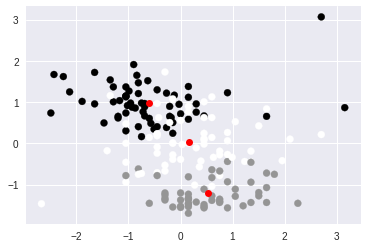

In [65]:
plt.scatter(wineDataNorm2[3,:],wineDataNorm2[6,:],c=m)
plt.plot(R[3,:],R[6,:],'ro')
plt.show()

In [66]:
for i in range(3):
    print('Group: ', i, ' # Size: ',groupSizes[i], ' # Results: ')
    for c in range(1,4):
        s = np.sum(M.T[i,wine.values[:,0]==c])
        print(c, s, ' -> ', s/groupSizes[i]*100,'%')

Group:  0  # Size:  65  # Results: 
1 0  ->  0.0 %
2 65  ->  100.0 %
3 0  ->  0.0 %
Group:  1  # Size:  51  # Results: 
1 0  ->  0.0 %
2 3  ->  5.88235294118 %
3 48  ->  94.1176470588 %
Group:  2  # Size:  62  # Results: 
1 59  ->  95.1612903226 %
2 3  ->  4.83870967742 %
3 0  ->  0.0 %
